<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4: Incarceration

# Contents:
- [Problem Statement](#Problem-Statement)
- [Background](#Background)
- [Exploratory Data Analysis, Cleaning, Imputation, and Feature Engineering](#EDA-and-Cleaning)

# Problem Statement

# Background

# EDA and Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df18to21 = pd.read_csv('./data/df18to21H.csv', index_col=0)
df18to21.drop(columns=['Unnamed: 0'], inplace=True)
df18to21.head()

,TOTPRISN,SENTYR,SENTIMP,RANGEPT,PRISDUM,PCNTDEPT,MNTHDEPT,NUMDEPEN,NOCOUNTS,MONRACE,...,STATMIN,PRESENT,MONSEX,OFFGUIDE,CHP3CHG1,CHP3CHG2,CHP3CHG3,CHP3CHG4,CHP3CHG5,CHP3CHG6
0,172,2017,1,NaN,1,8.510638,16.0,2.0,1,1,...,60.0,1.0,0.0,10,NaN,NaN,NaN,NaN,NaN,NaN
1,0,2017,1,2.0,1,NaN,NaN,1.0,1,0,...,0.0,1.0,1.0,17,NaN,NaN,NaN,NaN,NaN,NaN
2,6,2017,1,NaN,1,40.000000,4.0,1.0,1,0,...,0.0,1.0,0.0,17,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2017,1,NaN,1,50.000000,4.0,2.0,1,0,...,0.0,1.0,0.0,17,NaN,NaN,NaN,NaN,NaN,NaN
4,0,2017,1,2.0,1,NaN,NaN,3.0,1,0,...,0.0,1.0,0.0,17,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df18to21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267815 entries, 0 to 267814
Data columns (total 33 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   TOTPRISN  267815 non-null  int64  
 1   SENTYR    267815 non-null  int64  
 2   SENTIMP   267815 non-null  int64  
 3   RANGEPT   124419 non-null  float64
 4   PRISDUM   267815 non-null  int64  
 5   PCNTDEPT  132832 non-null  float64
 6   MNTHDEPT  132832 non-null  float64
 7   NUMDEPEN  238961 non-null  float64
 8   NOCOUNTS  267815 non-null  int64  
 9   MONRACE   267815 non-null  int64  
 10  NEWEDUC   240580 non-null  float64
 11  DISPOSIT  267815 non-null  int64  
 12  CITIZEN   266223 non-null  float64
 13  INOUT     73504 non-null   float64
 14  DISTRICT  267815 non-null  int64  
 15  SENTRNGE  266210 non-null  float64
 16  CRIMHIST  260983 non-null  float64
 17  COMBDRG2  80684 non-null   float64
 18  CASETYPE  262990 non-null  float64
 19  AGE       267615 non-null  float64
 20  ACCA

In [4]:
df18to21['TOTPRISN'] = [840 if i >= 840 else i for i in df18to21['TOTPRISN']]

In [5]:
df18to21 = df18to21.drop(columns=['CHP3CHG1','CHP3CHG2','CHP3CHG3', 'CHP3CHG4', 'CHP3CHG5', 'CHP3CHG6', 'INOUT', 'SENTRNGE', 
                                  'STATMIN', 'STATMAX', 'MNTHDEPT', 'ACCAP'])

Dropped these columns because CHP3CHGX columns contained more than 90% null values and INOUT and SENTRNGE were redundant.

In [6]:
df18to21 = df18to21.drop(df18to21[df18to21['TOTPRISN'] == 9997].index)

Dropped ~30 data values for individuals with unknown sentence lengths

In [7]:
df18to21['SENTYR'].value_counts()

2019    78754
2018    71220
2020    56955
2021    44676
2017    16210
Name: SENTYR, dtype: int64

In [8]:
df18to21 = df18to21.drop(df18to21[df18to21['SENTYR'] == 2017].index)

Dropped 16210 data values from 2017

In [9]:
df18to21.rename(columns= {'TOTPRISN': 'sentence_length', 'SENTYR': 'year_sentenced', 'SENTIMP': 'sentence_type', 'RANGEPT': 'guideline_range', 'PRISDUM': 'imprisoned',
                          'PCNTDEPT': 'guideline_var_pct', 'NUMDEPEN': 'dependents', 'NOCOUNTS': 'count_convictons', 'MONRACE': 'race', 'NEWEDUC': 'education', 
                          'DISPOSIT': 'disposition', 'CITIZEN': 'citizen', 'DISTRICT': 'state', 'CRIMHIST': 'criminal_hist', 'COMBDRG2': 'drug_type', 
                          'CASETYPE': 'case_type', 'AGE': 'age', 'WEAPON': 'weapon','PRESENT': 'presentence_stat', 'MONSEX': 'gender', 'OFFGUIDE': 'crime_type'}, inplace=True
)

In [10]:
df18to21['race'].value_counts()

0     144206
2      49976
1      48142
3       4815
4       3601
7        563
8        198
5         87
10        12
9          5
Name: race, dtype: int64

**Race Dictionary**: 

|Column|Value|Description|
|---|---|---|
|**race**|0|Hispanic| 
|**race**|1|White/ Caucasian| 
|**race**|2|Black/ African American| 
|**race**|3|American Indian/ Alaskan Native| 
|**race**|4|Asian or Pacific Islander| 
|**race**|5|Multi- Racial| 
|**race**|7|Other| 
|**race**|8|Unknown| 
|**race**|9|Non- US American Indians| 
|**race**|10|American Indian Citizenship Unknown|

In [11]:
df18to21['race'] = df18to21['race'].replace(10,3)
df18to21['race'] = df18to21['race'].replace(9,3)
df18to21['race'] = df18to21['race'].replace(8,7)
df18to21['race'] = df18to21['race'].replace(5,7)

- Consolidated Non-US American Indians and American Indian Citizenship with American Indian\Alaskan Native
- Consolidated Multiracial and Unknown with Other

In [12]:
df18to21['citizen'].value_counts()

1.0    144647
3.0     94644
2.0      7745
4.0      2019
5.0      1080
Name: citizen, dtype: int64

**Citizen Dictionary**: 

|Column|Value|Description|
|---|---|---|
|**citizen**|1|US Citizen| 
|**citizen**|2|Resident/ Legal Alien| 
|**citizen**|3|Illegal Alien| 
|**citizen**|4|Not US Citizen/ Alien Status Unknown| 
|**citizen**|5|Extradited Alien| 

In [13]:
df18to21['citizen'] = [1 if (i == 1) else 0 for i in df18to21['citizen']]

In [14]:
df18to21['dependents'].unique()

array([ 2., nan,  0.,  1.,  5.,  7.,  8.,  4.,  6.,  3., 10., 12.,  9.,
       11., 13., 19., 14., 15., 18., 17., 20., 16., 41., 33., 27., 36.,
       57., 55.])

In [15]:
df18to21['dependents'] = [0 if (i == 0) else 1 for i in df18to21['dependents']]

In [16]:
df18to21['drug_type'].fillna(0, inplace=True)

In [17]:
df18to21['drug_type'].unique()

array([ 3.,  0.,  6.,  2.,  1., 77.,  4.,  7.])

**Drug Type Dictionary**: 

|Column|Value|Description|
|---|---|---|
|**drug_type**|1|Cocaine| 
|**drug_type**|2|Crack| 
|**drug_type**|3|Heroin| 
|**drug_type**|4|Marijuana| 
|**drug_type**|6|Methamphetamine| 
|**drug_type**|7|Fentanyl| 
|**drug_type**|77|Other| 

In [18]:
df18to21['crime_type'].unique()

array([10, 17, 26, 13, 16,  7,  3, 21, 19,  4, 27, 12, 30, 29,  1, 11, 24,
       25, 23, 15, 22,  9,  5,  6, 28, 18,  2, 20, 14,  8])

**Crime Type Dictionary**: 

|Column|Value|Description|
|---|---|---|
|**crime_type**|1|Administration of Justice| 
|**crime_type**|2|Antitrust| 
|**crime_type**|3|Arson| 
|**crime_type**|4|Assault| 
|**crime_type**|5|Bribery/Corruption| 
|**crime_type**|6|Burglary/Trespass| 
|**crime_type**|7|Child Pornography| 
|**crime_type**|8|Commercialized Vice| 
|**crime_type**|9|Drug Possession| 
|**crime_type**|10|Drug Trafficking| 
|**crime_type**|11|Environmental| 
|**crime_type**|12|Extortion/Racketeering| 
|**crime_type**|13|Firearms| 
|**crime_type**|14|Food and Drug| 
|**crime_type**|15|Forgery/Counter/Copyright| 
|**crime_type**|16|Fraud/Theft/Embezzlement| 
|**crime_type**|17|Immigration| 
|**crime_type**|18|Individual Rights| 
|**crime_type**|19|Kidnapping| 
|**crime_type**|20|Manslaughter| 
|**crime_type**|21|Money Launder| 
|**crime_type**|22|Murder| 
|**crime_type**|23|National Defense| 
|**crime_type**|24|Obscenity/Other Sex Offenses| 
|**crime_type**|25|Prison Offenses| 
|**crime_type**|26|Robbery| 
|**crime_type**|27|Sex Abuse| 
|**crime_type**|28|Stalking/Harassing| 
|**crime_type**|29|Tax| 
|**crime_type**|30|Other| 

In [19]:
df18to21['crime_type'].mode()

0    17
Name: crime_type, dtype: int64

In [20]:
state_dict = {0:'Maine',1:'Massachusetts',2:'New Hampshire',3:'Rhode Island',4:'Puerto Rico',5:'Connecticut',\
6:'New York',7:'New York',8:'New York',9:'New York',10:'Vermont',11:'Delaware',12:'New Jersey',\
13:'Pennsylvania',14:'Pennsylvania',15:'Pennsylvania',16:'Maryland',17:'North Carolina',18:'North Carolina',\
19:'North Carolina',20:'South Carolina',22:'Virginia',23:'Virginia',24:'West Virginia',25:'West Virginia',\
26:'Alabama',27:'Alabama',28:'Alabama',29:'Florida',30:'Florida',31:'Florida',32:'Georgia',33:'Georgia',\
34:'Georgia',35:'Louisiana',36:'Louisiana',37:'Mississippi',38:'Mississippi',39:'Texas',40:'Texas',41:'Texas',\
42:'Texas',43:'Kentucky',44:'Kentucky',45:'Michigan',46:'Michigan',47:'Ohio',48:'Ohio',49:'Tennessee',50:'Tennessee',\
51:'Tennessee',52:'Illinois',53:'Illinois',54:'Illinois',55:'Indiana',56:'Indiana',57:'Wisconsin',58:'Wisconsin',\
60:'Arkansas',61:'Arkansas',62:'Iowa',63:'Iowa',64:'Minnesota',65:'Missouri',66:'Missouri',67:'Nebraska',\
68:'North Dakota',69:'South Dakota',70:'Arizona',71:'California',72:'California',73:'California',74:'California',\
75:'Hawaii',76:'Idaho',77:'Montana',78:'Nevada',79:'Oregon',80:'Washington',81:'Washington',82:'Colorado',83:'Kansas',\
84:'New Mexico',85:'Oklahoma',86:'Oklahoma',87:'Oklahoma',88:'Utah',89:'Wyoming',90:'District of Columbia',91:'Virgin Islands',\
93:'Guam',94:'North Mariana Islands',95:'Alaska',96:'Louisiana'}

df18to21['state'] = [state_dict.get(i) for i in df18to21['state']]

Replace numeric district with state name

In [21]:
region_dict = {'Connecticut':'Northeast', 'Maine':'Northeast', 'Massachusetts':'Northeast',\
'New Hampshire':'Northeast', 'Rhode Island':'Northeast', 'Vermont':'Northeast',\
'Delaware':'South', 'Maryland':'South', 'New Jersey':'Northeast',\
'New York':'Northeast', 'Pennsylvania':'Northeast','District of Columbia':'South',\
'Alabama':'South', 'Arkansas':'South', 'Florida':'South', 'Georgia':'South', 'Kentucky':'South',\
'Louisiana':'South', 'Mississippi':'South', 'Missouri':'South',\
'North Carolina':'South', 'South Carolina':'South', 'Tennessee':'South',\
'Virginia':'South', 'West Virginia':'South',\
'Illinois':'Midwest', 'Indiana':'Midwest', 'Iowa':'Midwest', 'Kansas':'Midwest',\
'Michigan':'Midwest', 'Minnesota':'Midwest', 'Nebraska':'Midwest',\
'North Dakota':'Midwest', 'Ohio':'Midwest', 'South Dakota':'Midwest', 'Wisconsin':'Midwest',\
'Arizona':'West', 'New Mexico':'West', 'Oklahoma':'South', 'Texas':'South',\
'Alaska':'West', 'California':'West', 'Colorado':'West', 'Hawaii':'West',\
'Idaho':'West', 'Montana':'West', 'Nevada':'West', 'Oregon':'West', 'Utah':'West',\
'Washington':'West', 'Wyoming':'West'}

df18to21['region'] = [region_dict.get(i) for i in df18to21['state']]

Categorize states to respective regions and add column for analysis

In [22]:
df18to21 = df18to21[df18to21['region'].notnull()]

In [23]:
df18to21['college'] = [1 if (i == 5) or (i == 6) else 0  for i in df18to21['education']]
df18to21.drop(columns=['education'], inplace=True)

In [24]:
df18to21['white'] = [1 if (i == 1) else 0  for i in df18to21['race']]

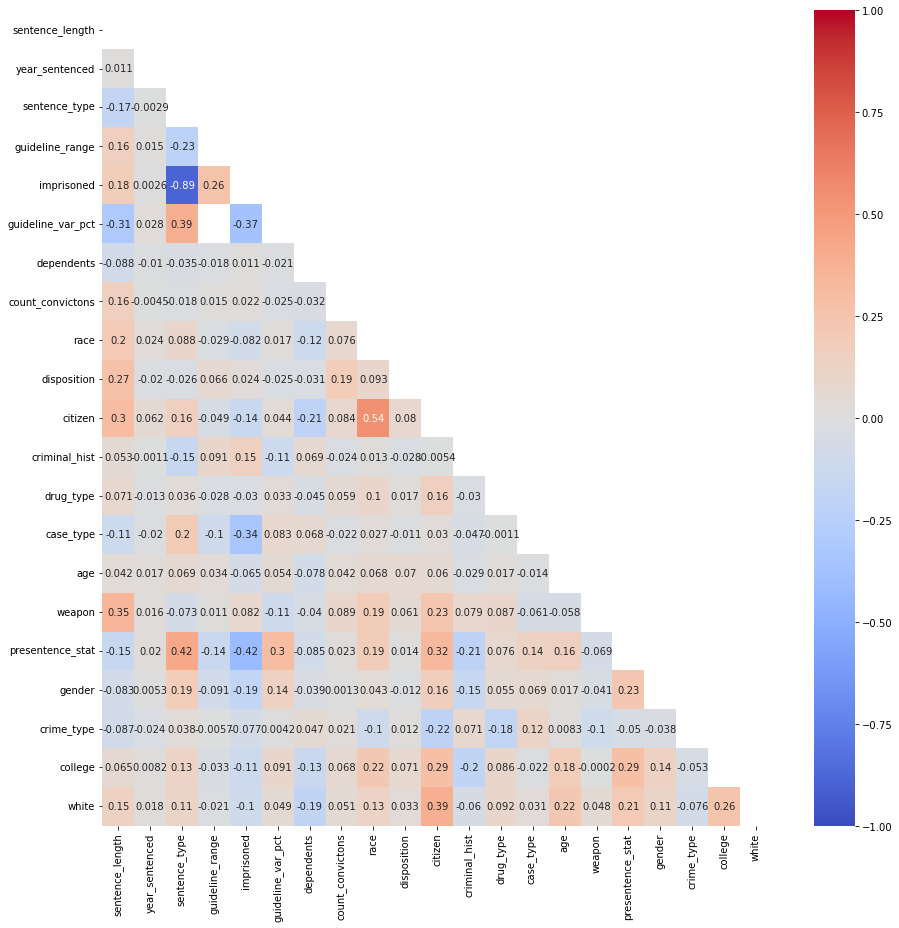

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(df18to21.corr(),vmin=-1, vmax= 1, annot=True, cmap='coolwarm', mask= np.triu(df18to21.corr()));

In [26]:
population18_20 = pd.read_csv('https://www2.census.gov/programs-surveys/popest/datasets/2010-2020/national/totals/nst-est2020-popchg2010-2020.csv')
population18_20 = population18_20[['NAME', 'POPESTIMATE2018', 'POPESTIMATE2019','POPESTIMATE2020']]
population18_20.rename(columns={'NAME': 'state', 'POPESTIMATE2018': 2018, 'POPESTIMATE2019': 2019, 'POPESTIMATE2020': 2020}, inplace=True)
population18_20.head(2)

,state,2018,2019,2020
0,United States,326838199,328329953,329484123
1,Northeast Region,56084543,56002934,55849869


In [27]:
population21 = pd.read_csv('./data/PEPPOP2021.NST_EST2021_POP-2022-05-11T014539.csv')
population21.drop(columns=['Estimates Base Population, April 1, 2020 (POP_BASE2020)',
                           'Population Estimate, July 1, 2020 (POP_2020)'], inplace=True)
population21.rename(columns={'Population Estimate, July 1, 2021 (POP_2021)': 2021, 'Geographic Area Name (NAME)': 'state'}, inplace=True)
population21.head(2)

,state,2021
0,United States,"331,893,745"
1,South Region,"127,225,329"


In [28]:
population = pd.merge(left=population18_20, right=population21, left_on='state', right_on='state')
population.drop([56], inplace=True)
population.head(2)

,state,2018,2019,2020,2021
0,United States,326838199,328329953,329484123,"331,893,745"
1,Northeast Region,56084543,56002934,55849869,"57,159,838"


In [29]:
population[2021] = population[2021].str.replace(',','').astype(int)
population.set_index('state',inplace=True)
population['average'] = population.mean(axis=1)
population = population.rename(index={'South Region': 'South', 'Northeast Region': 'Northeast', 'Midwest Region': 'Midwest',
                              'West Region': 'West'})

In [30]:
census20 = pd.read_csv('./data/census_20.csv')
census20 = census20.rename(columns={'total_pop':'2020_pop','white_pop':'2020_whitepop','white_perc':'2020_white_per'})

In [31]:
census20['2020_minority_per'] = [1 - i for i in census20['2020_white_per']]
data = pd.read_csv('./data/df18to21_cleanedH.csv', index_col=0)
conv_count = pd.DataFrame(data.groupby('state')['age'].count())
conv_count = conv_count.rename(columns={'age':'conv_18to21'})

In [32]:
census20 = pd.merge(census20,conv_count,how='inner',on='state')
census20['conv_per100K'] = round(census20['conv_18to21'] / (census20['2020_pop']/100000),0)
conv_perc = pd.DataFrame(data.groupby('state')['white'].mean())
conv_perc['minority'] = 1 - conv_perc['white']
census20 = pd.merge(census20,conv_perc,how='inner',on='state')
census20 = census20.rename(columns={'white':'conv_white_per','minority':'conv_minority_per'},)

In [33]:
census20['by_white_pop'] = census20['2020_white_per'] - census20['conv_white_per']
census20['by_minority_pop'] = census20['2020_minority_per'] - census20['conv_minority_per']

In [34]:
population_total = pd.merge(left= population, right=census20, on='state')

In [35]:
population_total.to_csv('./data/population.csv',index=False)

In [36]:
population_total.head(2)

,state,2018,2019,2020,2021,average,2020_pop,2020_whitepop,2020_white_per,2020_minority_per,conv_18to21,conv_per100K,conv_white_per,conv_minority_per,by_white_pop,by_minority_pop
0,Alabama,4891628,4907965,4921532,5039877,4940250.5,3917166,2595046,0.66248,0.33752,3667,94.0,0.341969,0.658031,0.320512,-0.320512
1,Alaska,736624,733603,731158,732673,733514.5,554003,349626,0.63109,0.36891,612,110.0,0.459150,0.540850,0.171940,-0.171940


In [37]:
df18to21_cleanedH = df18to21.copy(deep=True)

In [38]:
df18to21_cleanedH['age'].fillna(df18to21_cleanedH['age'].mean(), inplace=True)  
df18to21_cleanedH['criminal_hist'].fillna(df18to21_cleanedH['criminal_hist'].mode()[0], inplace=True)    
df18to21_cleanedH['case_type'].fillna(df18to21_cleanedH['case_type'].mode()[0], inplace=True)    
df18to21_cleanedH['gender'].fillna(df18to21_cleanedH['gender'].mode()[0], inplace=True)   
df18to21_cleanedH['guideline_range'].fillna(0, inplace=True)
df18to21_cleanedH['guideline_var_pct'].fillna(0, inplace=True)
df18to21_cleanedH['drug_type'].fillna(0, inplace=True)
df18to21_cleanedH['presentence_stat'].fillna(1, inplace=True)

Strategy for dealing with null values: 
- 'age' - impute with mean
- 'criminal_hist' - impute with mode
- 'case_type' - impute with mode
- 'gender' - impute with mode
- 'guideline_range' - impute with 0
- 'guideline_var_pct' - impute with 0
- 'drug_type' - impute with 0
- 'presentence_stat' - impute with 1

In [39]:
df18to21_cleanedH.to_csv('./data/df18to21_cleanedH.csv', index=False)

In [40]:
df18to21_cleanedH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247555 entries, 12990 to 267814
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sentence_length    247555 non-null  int64  
 1   year_sentenced     247555 non-null  int64  
 2   sentence_type      247555 non-null  int64  
 3   guideline_range    247555 non-null  float64
 4   imprisoned         247555 non-null  int64  
 5   guideline_var_pct  247555 non-null  float64
 6   dependents         247555 non-null  int64  
 7   count_convictons   247555 non-null  int64  
 8   race               247555 non-null  int64  
 9   disposition        247555 non-null  int64  
 10  citizen            247555 non-null  int64  
 11  state              247555 non-null  object 
 12  criminal_hist      247555 non-null  float64
 13  drug_type          247555 non-null  float64
 14  case_type          247555 non-null  float64
 15  age                247555 non-null  float64
 16

In [41]:
df18to21_cleanedH.head(2)

,sentence_length,year_sentenced,sentence_type,guideline_range,imprisoned,guideline_var_pct,dependents,count_convictons,race,disposition,...,drug_type,case_type,age,weapon,presentence_stat,gender,crime_type,region,college,white
12990,188,2018,1,1.0,1,0.0,1,1,0,3,...,3.0,1.0,24.0,0,1.0,0.0,10,West,0,0
14616,0,2018,1,0.0,1,0.0,1,1,0,1,...,0.0,1.0,28.0,0,1.0,0.0,17,South,0,0


## Analysis of Hispanic Population (Majority Class)

In [42]:
hisp_defendants = df18to21_cleanedH[df18to21_cleanedH['race'] == 0]

62% of the Hispanic defendants were convicted on immigration charges.

In [43]:
hisp_defendants['crime_type'].value_counts(normalize=True)[:5]

17    0.625424
10    0.217949
13    0.040597
16    0.037666
21    0.012636
Name: crime_type, dtype: float64

Of these defendants arrested for immigration charges, ~84% of these convictions took place in the Southwest states of Texas, Arizona, New Mexico and California.

In [44]:
hisp_defendants[(hisp_defendants['crime_type'] == 17)]['state'].value_counts(normalize=True)[:5]

Texas         0.518577
Arizona       0.136422
New Mexico    0.104364
California    0.078529
Florida       0.028963
Name: state, dtype: float64

The mean sentence length for Hispanic defendants whose primary offense is immigration-related is 8.12 years, with a third quartile equaling 12 years.

In [45]:
hisp_defendants[hisp_defendants['crime_type'] == 17]['sentence_length'].describe()

count    87904.000000
mean         8.123658
std         13.969553
min          0.000000
25%          0.000000
50%          0.000000
75%         12.000000
max        840.000000
Name: sentence_length, dtype: float64

The mean sentence length for non-Hispanic defendants whose primary offense is immigration-related is 10.26 years.

In [46]:
df18to21_cleanedH[(df18to21_cleanedH['crime_type'] == 17) & (df18to21_cleanedH['race'] != 0)]['sentence_length'].describe()

count    2873.000000
mean       10.267316
std        15.531044
min         0.000000
25%         0.000000
50%         6.000000
75%        15.000000
max       262.000000
Name: sentence_length, dtype: float64

## Immigration Offenses in Border States

In [47]:
df18to21_cleanedH[df18to21_cleanedH['state']=='Texas']['crime_type'].value_counts(normalize=True)[:5]

17    0.689446
10    0.168408
13    0.045658
16    0.030647
21    0.008115
Name: crime_type, dtype: float64

In [48]:
df18to21_cleanedH[df18to21_cleanedH['state']=='Arizona']['crime_type'].value_counts(normalize=True)[:5]

17    0.697430
10    0.124972
16    0.035896
9     0.032019
4     0.023654
Name: crime_type, dtype: float64

In [49]:
df18to21_cleanedH[df18to21_cleanedH['state']=='New Mexico']['crime_type'].value_counts(normalize=True)[:5]

17    0.798140
10    0.094988
13    0.030744
16    0.013865
4     0.011454
Name: crime_type, dtype: float64

In [50]:
df18to21_cleanedH[df18to21_cleanedH['state']=='California']['crime_type'].value_counts(normalize=True)[:5]

10    0.376471
17    0.354152
16    0.091552
13    0.056596
21    0.021351
Name: crime_type, dtype: float64

Immigration offenses are the primary offense for over 68% of defendants in Texas and Arizona. That figure is 79.8% in New Mexico.

## Immigration Offenses by Year

The number of defendants charged with immigration offenses fell with the onset of the pandemic, as the U.S. government insituted changes to policy regrading migrants, which may have caused fewer migratns to attempt to cross the southern U.S. border.

https://www.axios.com/2022/03/30/title-42-covid-border-policy-ends-border-surge-immigration

In [51]:
df18to21_cleanedH[(df18to21_cleanedH['crime_type'] == 17)].groupby('year_sentenced')['age'].count()

year_sentenced
2018    25150
2019    30725
2020    21761
2021    13141
Name: age, dtype: int64

## Convictions by Year

Convictions by year decreased post-pandemic.

In [52]:
df18to21_cleanedH.groupby('year_sentenced')['age'].count()

year_sentenced
2018    70194
2019    77430
2020    56039
2021    43892
Name: age, dtype: int64

But there was little change in the percent of defendants who were given prison sentences.

In [53]:
df18to21_cleanedH.groupby('year_sentenced')['imprisoned'].mean()

year_sentenced
2018    0.911901
2019    0.919928
2020    0.914167
2021    0.915771
Name: imprisoned, dtype: float64

### Crime Types

In [66]:
df18to21_cleanedH['crime_type'].value_counts(normalize=True)[:10]

17    0.366694
10    0.267924
13    0.117744
16    0.082689
26    0.022581
7     0.018788
21    0.016255
27    0.015504
30    0.013145
4     0.010422
Name: crime_type, dtype: float64

## Violent Crime Analysis

https://www.ussc.gov/guidelines/amendment/798#:~:text=%E2%80%9C%20'Crime%20of%20violence'%20includes,and%20burglary%20of%20a%20dwelling.

“Crime of violence’ includes murder, manslaughter, kidnapping, aggravated assault, forcible sex offenses, robbery, arson, extortion, extortionate extension of credit, and burglary of a dwelling."

In [55]:
violent_crimes = [22,27,20,19,4,26,3,12,26]

In [56]:
df18to21_cleanedH['violent_crime'] = [1 if i in violent_crimes else 0 for i in df18to21_cleanedH['crime_type']]

Percent of violent offenses, as a percent of total offenses, ticked down in 2020, but rebounded in 2021.

In [57]:
df18to21_cleanedH.groupby('year_sentenced')['violent_crime'].mean()

year_sentenced
2018    0.061472
2019    0.057613
2020    0.053374
2021    0.063223
Name: violent_crime, dtype: float64

In [58]:
df18to21_cleanedH['over25'] = [1 if i >=25 else 0 for i in df18to21_cleanedH['age']]

Defendants aged 25 or older committed violent crimes at a lower rate than those below age 25.

In [59]:
df18to21_cleanedH.groupby('over25')['violent_crime'].mean()

over25
0    0.087101
1    0.054628
Name: violent_crime, dtype: float64

## Analysis of Native American/Alaskan Native Defendants

In [60]:
indigenous_defendants = df18to21_cleanedH[df18to21_cleanedH['race'] == 3]

In [61]:
indigenous_defendants['sentence_length'].median()

27.0

In [62]:
df18to21_cleanedH['sentence_length'].median()

18.0

The median sentence length for defendants identified as being Native American or native Alaskan is much higher than that of the defendant population as a whole.

In [63]:
indigenous_defendants['violent_crime'].mean()

0.4009521838128752

In [64]:
df18to21_cleanedH['violent_crime'].mean()

0.05874250166629638

The primary offense for 40% of Native American/native Alaskan is considered violent.  This is likely due to the federal government claiming jurisdiction over what it considers to be serious offense perpetrated by Native Americans. Per an article from the U.S. Department of Justice: "Under the Major Crimes Act (MCA) of 1885, major felonies such as murder, sexual abuse, and kidnapping, are typically investigated by the FBI and prosecuted by U.S. Attorneys if they are committed by Native Americans on tribal land." Thus,the federal court will tend to hear more cases involving this population for which larger sentences might be applied.

https://cops.usdoj.gov/html/dispatch/01-2022/McGirt_decision.html

In [65]:
indigenous_defendants['crime_type'].value_counts(normalize=True)[:5]

4     0.206789
10    0.190644
13    0.112192
27    0.093769
16    0.053819
Name: crime_type, dtype: float64

Assault, drug trafficking, firearms, sex abuse, and fraud/embezzlement are the five mose frequent offenses for the indigenous defendant population.